### Handwriten recognition using deep learning:Convolutional Neural Networks
### Running time: 10 minutos
### Edgar Acuna

In [1]:
import keras
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


<class 'numpy.ndarray'>


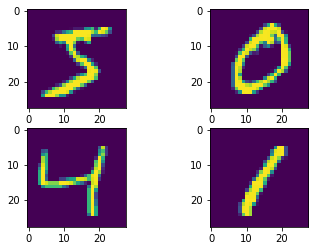

In [3]:
# normalize x
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.
print(type(X_train))
# prepare image and figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(X_train[0])
ax2.imshow(X_train[1])
ax3.imshow(X_train[2])
ax4.imshow(X_train[3])

In [4]:
# Changing dimension of input images from N*28*28 to  N*784
#X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_train=X_train.reshape(-1,28,28,1)
#X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
X_test=X_test.reshape(-1,28,28,1)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)
## Changing labels to one-hot encoded vector
#lb = LabelBinarizer()
#y_train = lb.fit_transform(y_train)
y_train=to_categorical(y_train)
#y_test = lb.transform(y_test)
y_test=to_categorical(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train dimension:
(60000, 28, 28, 1)
Test dimension:
(10000, 28, 28, 1)
Train labels dimension:
(60000, 10)
Test labels dimension:
(10000, 10)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(X_train,y_train,test_size=.2,random_state=13)

In [6]:
from keras.models import Sequential,Input, Model
from keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPooling2D 
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [7]:
## Importing required libraries
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.compat.v1.InteractiveSession()

In [8]:
batch_size=128
epochs=15
num_classes=10

In [9]:
#Anadiendo capas secuencialmente al modelo
digits_model=Sequential()
digits_model.add(Conv2D(32,kernel_size=(3,3),activation="linear",input_shape=(28,28,1),padding="same"))
digits_model.add(LeakyReLU(alpha=.1))
digits_model.add(MaxPooling2D((2,2),padding="same"))
digits_model.add(Conv2D(64,(3,3),activation="linear",padding="same"))
digits_model.add(LeakyReLU(alpha=.1))
digits_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
digits_model.add(Conv2D(128,(3,3),activation="linear",padding="same"))
digits_model.add(LeakyReLU(alpha=.1))
digits_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
digits_model.add(Flatten())
digits_model.add(Dense(128,activation="linear"))
digits_model.add(LeakyReLU(alpha=.1))
digits_model.add(Dense(num_classes,activation="softmax"))

In [10]:
#compilando con las capas
digits_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [11]:
digits_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [12]:
digits_train=digits_model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val,y_val))

Epoch 1/15
375/375 [==============================] - 39s 100ms/step - loss: 0.5307 - accuracy: 0.8393 - val_loss: 0.0832 - val_accuracy: 0.9732
Epoch 2/15
375/375 [==============================] - 41s 108ms/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.0486 - val_accuracy: 0.9833
Epoch 3/15
375/375 [==============================] - 41s 108ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0424 - val_accuracy: 0.9867
Epoch 4/15
375/375 [==============================] - 37s 99ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0327 - val_accuracy: 0.9896
Epoch 5/15
375/375 [==============================] - 40s 108ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0379 - val_accuracy: 0.9887
Epoch 6/15
375/375 [==============================] - 39s 104ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0409 - val_accuracy: 0.9893
Epoch 7/15
375/375 [==============================] - 38s 102ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.0411 - val_acc

In [13]:
test_eval=digits_model.evaluate(X_test,y_test,verbose=0)

In [14]:
print(test_eval[1])

0.9933000206947327
